In [7]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

df = pd.read_excel('data/Monthly Mastersheet with Original Data.xlsx')

print(df.shape)

# Identify numeric columns only (excludes datetime, strings, etc.)
# added this
numeric_cols = df.select_dtypes(include=[np.number]).columns
print("Numeric columns for PCA:", numeric_cols)


scaler = StandardScaler()
scaled_array = scaler.fit_transform(df[numeric_cols])

scaled_df = pd.DataFrame(scaled_array, columns=numeric_cols, index=df.index)
# changed this part  up

print(scaled_df.shape)


print(scaled_df)

print(scaled_df.dtypes)
print(scaled_df.isnull().sum())

print("Before NA drop : " + str(scaled_df.shape))
scaled_df = scaled_df.dropna()
print("AFTER NA drop : " + str(scaled_df.shape))

print(scaled_df.shape)


(89, 17)
Numeric columns for PCA: Index(['Bitcoin', 'Litecoin', 'XRP', 'Ethereum', 'Dogecoin', 'Cardano', 'Tether', 'USD Coin', 'LFPR', 'CPI', 'r', 'M1', 'IM', 'EX', 'CC', 'GDP'], dtype='object')
(89, 16)
     Bitcoin  Litecoin       XRP  Ethereum  Dogecoin   Cardano    Tether  USD Coin      LFPR       CPI         r        M1        IM        EX        CC       GDP
0   0.916366  0.938104  1.000136  0.459819 -0.144169       NaN  1.020463       NaN  1.104362 -1.252629 -0.589741 -1.359056 -1.127429 -0.501662  1.060630 -1.421292
1   1.063204  1.569994  0.533519  1.651325  1.243560       NaN  1.094440       NaN  0.448013 -1.259050 -0.589741 -1.348112 -0.887014 -0.658988  1.438889 -1.409563
2   0.362272 -0.094169  0.445469 -0.815493 -0.094025       NaN  0.862752       NaN  0.448013 -1.258803 -0.584611 -1.351889 -0.887014 -0.658988  1.290287 -1.282442
3   1.240928  0.723540  0.327256  0.485823  0.893439       NaN  2.069150       NaN  0.448013 -1.264771 -0.512781 -1.345976 -0.887014 -0.658988 

In [8]:
dropped_df = df.drop(['Month','Bitcoin', 'Litecoin', 'XRP', 'Ethereum', 'Dogecoin', 'Cardano','USD Coin','Tether'], axis=1).dropna()
print(dropped_df)

macro_vars = ['LFPR', 'CPI', 'r', 'M1', 'GDP', 'IM', 'EX', 'CC']

pca = PCA(n_components=8)

my_data_df_scaled_PCA = pca.fit_transform(scaled_df[macro_vars])


pca_df = pd.DataFrame(my_data_df_scaled_PCA, columns=[f'PC{i+1}' for i in range(8)], index=scaled_df.index)


print(pca_df)



explained_var = pca.explained_variance_
explained_var_ratio = pca.explained_variance_ratio_
cumulative_var_ratio = np.cumsum(explained_var_ratio)

summary_df = pd.DataFrame({
    'Principal Component': [f'PC{i+1}' for i in range(len(explained_var))],
    'Eigenvalue': explained_var,
    'Explained Variance (%)': explained_var_ratio * 100,
    'Cumulative Variance (%)': cumulative_var_ratio * 100
})

print(summary_df)


    LFPR      CPI     r       M1        IM        EX     CC       GDP
0   63.1  246.819  1.15   3535.6  2916.022  2535.501   95.1  19743.84
1   62.7  246.663  1.15   3615.0  3034.004  2479.107  100.7  19758.12
2   62.7  246.669  1.16   3587.6  3034.004  2479.107   98.5  19912.89
3   62.7  246.524  1.30   3630.5  3034.004  2479.107   95.9  19975.98
4   62.7  247.867  1.41   3673.4  3093.299  2517.268   95.7  20005.47
5   63.0  248.991  1.42   3568.2  3093.299  2517.268   99.7  20093.46
6   62.9  249.554  1.51   3655.7  3093.299  2517.268  101.4  20033.28
7   62.9  250.546  1.69   3728.7  3105.995  2562.172   98.8  20087.11
8   62.9  251.588  1.70   3632.5  3105.995  2562.172   98.0  20183.30
9   63.0  251.989  1.82   3645.5  3105.995  2562.172   98.2  20181.03
10  63.0  252.006  1.91   3699.4  3153.747  2535.501   97.9  20259.68
11  62.6  252.146  1.91   3664.8  3153.747  2535.501   96.2  20292.70
12  62.8  252.439  1.95   3678.4  3153.747  2535.501  100.1  20276.13
13  62.9  252.885  2

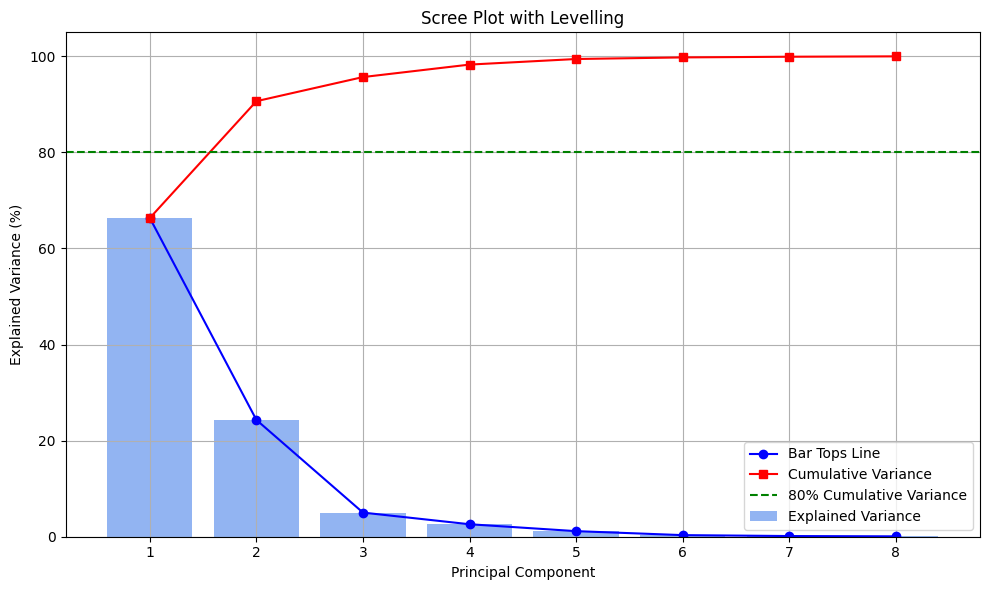

In [9]:

explained_variance_ratio = pca.explained_variance_ratio_[:20]
cumulative_variance = np.cumsum(explained_variance_ratio)
n_components = len(explained_variance_ratio)
avg_explained = 1.0 / n_components  # average variance threshold

x_vals = np.arange(1, n_components + 1)
y_vals = explained_variance_ratio * 100

plt.figure(figsize=(10, 6))

plt.bar(x_vals, y_vals, alpha=0.7, color='cornflowerblue', label='Explained Variance')

plt.plot(x_vals, y_vals, marker='o', color='blue', label='Bar Tops Line')

plt.plot(x_vals, cumulative_variance * 100, marker='s', color='red', label='Cumulative Variance')

# 80% line
plt.axhline(y=80, color='green', linestyle='--', label='80% Cumulative Variance')

# Plot formatting
plt.title('Scree Plot with Levelling')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance (%)')
plt.xticks(x_vals)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [10]:
#added this
loading_df = pd.DataFrame(
    pca.components_.T,
    index=macro_vars,
    columns=[f'PC{i+1}' for i in range(pca.n_components_)]
)

cutoff = 0.5

filtered_loading_df = loading_df[(loading_df.abs() >= cutoff).any(axis=1)]

print(filtered_loading_df)

pc = 'PC1'
print(filtered_loading_df[pc].sort_values(key=abs, ascending=False))

print("Loadings : ")
print(loading_df)
print("Loading Dim : ")
print(loading_df.shape)

# select num_PC = 2
num_PC = 2

           PC1       PC2       PC3       PC4       PC5       PC6       PC7       PC8
LFPR  0.167143  0.667861 -0.351227 -0.252165  0.539928  0.017454  0.201020 -0.082719
CPI   0.401342 -0.092903  0.237038  0.074255 -0.070549  0.593237  0.639854  0.047666
r     0.383779  0.324905  0.758607 -0.023609 -0.003900 -0.367897 -0.120310 -0.145843
M1    0.210546 -0.492762 -0.068612  0.292089  0.544069 -0.487323  0.298164  0.020890
GDP   0.397951  0.005761 -0.081896  0.480484  0.266573  0.391305 -0.612621  0.067407
IM    0.435786 -0.068537 -0.395115  0.018511 -0.400379 -0.148629  0.005468 -0.683016
EX    0.459357  0.082393 -0.270568 -0.106916 -0.353077 -0.274880 -0.000135  0.705224
CC   -0.245131  0.430621 -0.065042  0.776136 -0.226818 -0.155446  0.267333  0.027975
EX      0.459357
IM      0.435786
CPI     0.401342
GDP     0.397951
r       0.383779
CC     -0.245131
M1      0.210546
LFPR    0.167143
Name: PC1, dtype: float64
Loadings : 
           PC1       PC2       PC3       PC4       PC5       

In [11]:
scores = pd.DataFrame(my_data_df_scaled_PCA[:, :num_PC], columns=[f'PC{i+1}' for i in range(num_PC)], index=scaled_df.index)

print("PCA scores : ")

print(scores)

print("PCA scores shape : ")

print(scores.shape)

loadings_times_sd = pca.components_.T[:, :num_PC] * np.sqrt(pca.explained_variance_[:num_PC])

loadings_times_sd_df = pd.DataFrame(loadings_times_sd)

print("loadings_times_sd_df shape : ")
print(loadings_times_sd_df.shape)


print("original data df.shape : ")
print(df.shape)

loadings_times_sd_mat = np.array(loadings_times_sd_df)

df_mat = np.array(dropped_df)

new_data_mat = np.matmul(df_mat, loadings_times_sd_mat)

print(new_data_mat)



new_data_df = pd.DataFrame(new_data_mat, columns=[f'PC{i+1}' for i in range(num_PC)])

print("new_data_df shape : ")
print(new_data_df.shape)

print("new_data_df  : ")
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000) # Adjust width as needed
print(new_data_df)

PCA scores : 
         PC1       PC2
16 -2.006897  2.223246
17 -2.048860  2.295808
18 -2.104304  2.315509
19 -2.051016  2.047337
20 -2.054380  2.237132
21 -1.953957  2.288756
22 -1.943861  2.406295
23 -1.846649  2.114000
24 -1.875055  2.302170
25 -1.963890  2.452368
26 -2.000107  2.443428
27 -2.041663  2.507841
28 -2.307585  2.513658
29 -2.294580  2.551771
30 -2.807113  1.260871
31 -5.210385 -2.179458
32 -4.446172 -2.161360
33 -4.002145 -1.248346
34 -2.965161 -1.425552
35 -2.866724 -1.167441
36 -2.971191 -1.334127
37 -2.455248 -0.968680
38 -2.492225 -1.352744
39 -2.495650 -1.263949
40 -2.090509 -1.430607
41 -2.128266 -1.511397
42 -2.050867 -1.202619
43 -1.689322 -1.025399
44 -1.562384 -1.197388
45 -1.509690 -1.027487
46 -1.155880 -1.056650
47 -0.990083 -1.501333
48 -0.984145 -1.445749
49 -0.357815 -1.373380
50 -0.228107 -1.410114
51 -0.173143 -1.233185
52  0.234720 -1.136256
53  0.334613 -1.272101
54  0.555238 -1.273320
55  0.910239 -1.176758
56  1.176856 -1.182082
57  1.423846 -1.4775

In [13]:
new_data_df.to_excel("macro_PCA.xlsx", index=False)